<a href="https://colab.research.google.com/github/Ganesh-Subramanian/Transport-Demand-Prediction/blob/main/Final_Nairobi_transport_demand_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>



## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing libraries

In [1]:
#Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [3]:
#Mounting Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing csv file using pandas .read_csv() function
df_1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analytics/train_revised.csv')

In [6]:
# checking Head of the Dataframe using .head() function
df_1.head(5)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


**Data Pre Processing**

In [7]:
# Checking information of d1_1.info()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
# Checking rows and columns present in df_1
df_1.shape

(51645, 10)

In [9]:
# Checking describtion of df_1 it gives count,mean,std,min etc
df_1.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [10]:
#Checking Null values
df_1.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Data Visualization**

In [11]:
plt.rcParams["figure.figsize"] = [10, 5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


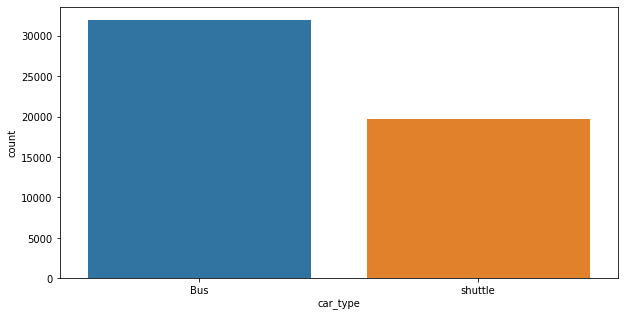

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


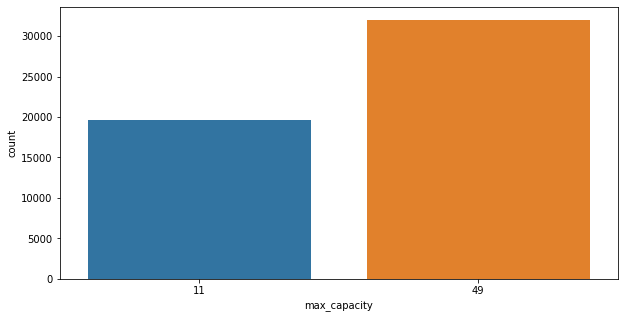

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


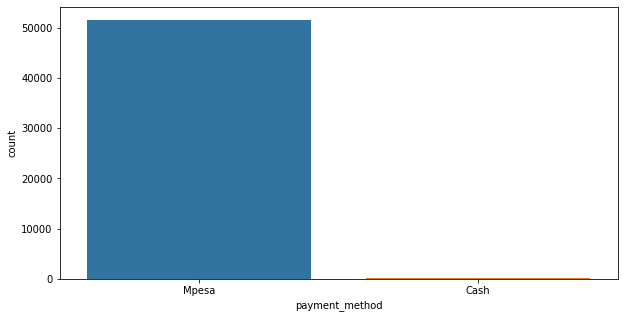

In [12]:
#Getting Insights of Data by plotting countplot
plots_count_columns=['car_type','max_capacity','payment_method']
for plots in plots_count_columns:
  sns.countplot(df_1[plots])
  plt.show()


Inference:

1.   There are two type of cars . The most used is Bus with Maximun capacity of 49.
2.   There are two modes of payments Mpesa and Cash. The most used is Mpesa.

In [13]:
#plotting Distplot and Boxplot graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


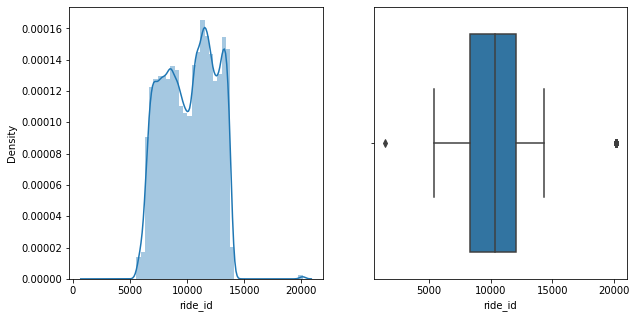

In [14]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['ride_id'], ax=axes[0])
sns.boxplot(df_1['ride_id'], ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


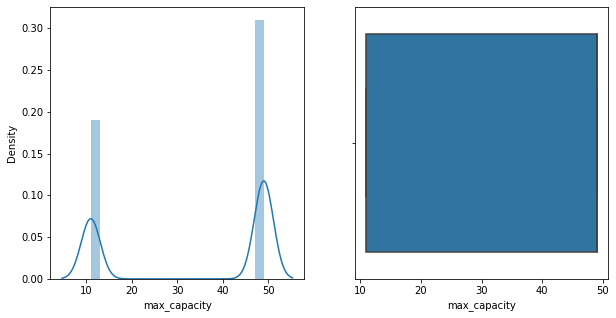

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['max_capacity'], ax=axes[0])
sns.boxplot(df_1['max_capacity'], ax=axes[1])

Inference: Maximum Capacity of Bus is 49

In [16]:
plt.rcParams["figure.figsize"] = [15, 5]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


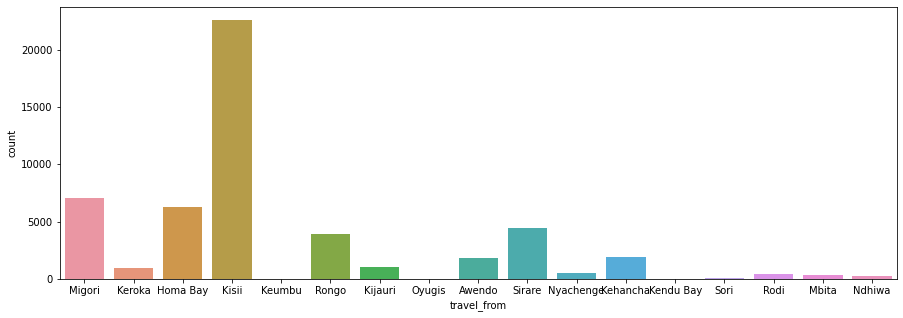

In [17]:
#Plotting countplot to count max values
sns.countplot(df_1['travel_from'])
plt.show()

Inference: Maximum People travelling from Kissi

In [18]:
# Grouping the ride_id and seat_numbers to get Targetvariable

In [19]:
target=df_1.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
target=target.drop_duplicates('ride_id')

In [20]:
#Mergging data using leftjoin

In [21]:
df=df_1.merge(target,how='left',on='ride_id')

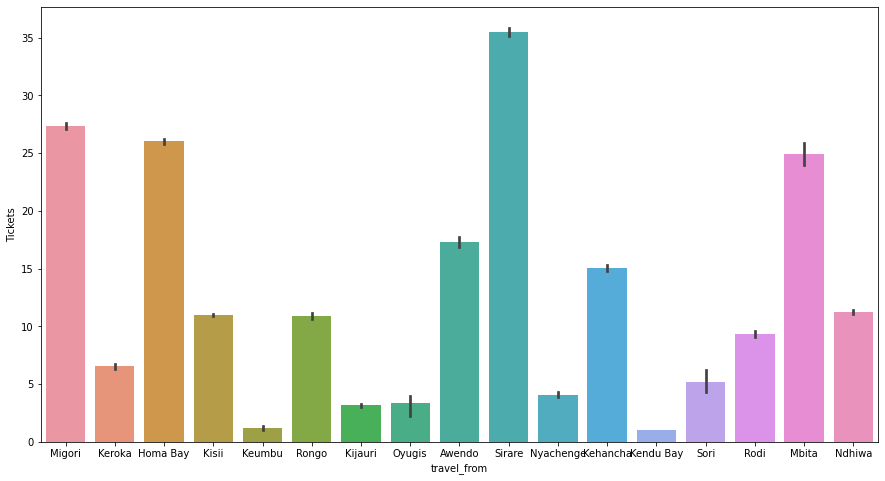

In [22]:
#plotting barplot 
plt.figure(figsize=(15,8))
sp=sns.barplot(x='travel_from',y='Tickets',data=df)

Inference: Maximum Tickets were from Sirare

In [23]:
# Dropping the columns not required

In [24]:
df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [25]:
df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'Tickets'],
      dtype='object')

In [26]:
df.drop(['travel_to'],axis=1,inplace=True)

In [27]:
# creating new column 'date' in dataframe

In [28]:
df['date']=df['travel_date']+" "+df['travel_time']
def  time_feature(data):

  ''' This function takes dataframe as an argument and extracts the different features
       from the data variable ofthe dataset and finally returns the updated dataset'''
  df['date']=pd.to_datetime(df['date'])
  df['day_of_week']=df['date'].dt.dayofweek
  df['day_of_year']=df['date'].dt.dayofyear
  df['day_of_month']=df['date'].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return data

In [29]:
df_new = time_feature(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [30]:
# checking information of new data frame df_new

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_date   51645 non-null  object        
 2   travel_time   51645 non-null  object        
 3   travel_from   51645 non-null  object        
 4   car_type      51645 non-null  object        
 5   max_capacity  51645 non-null  int64         
 6   Tickets       51645 non-null  int64         
 7   date          51645 non-null  datetime64[ns]
 8   day_of_week   51645 non-null  int64         
 9   day_of_year   51645 non-null  int64         
 10  day_of_month  51645 non-null  int64         
 11  year_woy      51645 non-null  object        
 12  hour          51645 non-null  int64         
 13  minute        51645 non-null  int64         
 14  is_weekend    51645 non-null  int64         
 15  year          51645 non-null  int64 

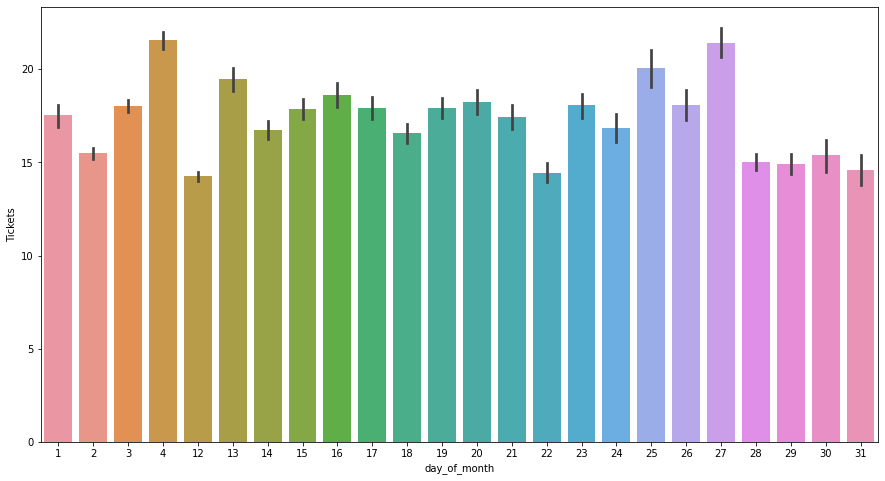

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_of_month',y='Tickets',data=df_new)

Inference: There is gap between 5 to 11 ,which we can assume as Holidays

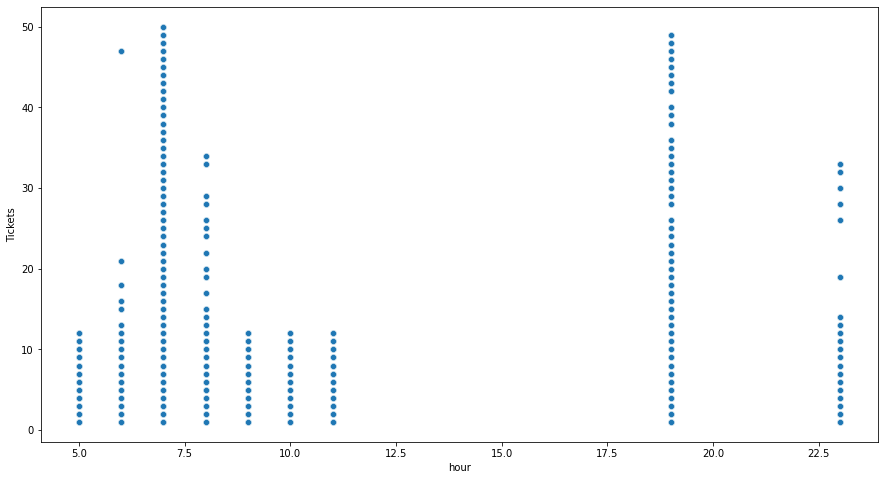

In [33]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='hour', y="Tickets", data=df_new)

Inference:
* We can see that most of the ticktes were sold at  7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

* From the above we can say that there is not ride between 12pm to 5.30Pm 

In [34]:
# Replacing Categorical Values to Numerical Values

In [35]:
df_new['car_type'].replace(['Bus', 'shuttle'],
                        [0, 1], inplace=True)

In [36]:
df_new['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [37]:
# Replacing Categorical values to numerical values

In [38]:
df_new["travel_from"].replace(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

In [39]:
# create variables columns not required and dropping few columns

In [40]:
notreq = ["travel_date","travel_time","car_type","year_woy"]

In [41]:
df_new.drop(columns = "travel_date",inplace= True)

In [42]:
df_new.drop(columns = "travel_time",inplace= True)

In [43]:
df_new.drop(columns = "year_woy",inplace= True)

In [44]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_from   51645 non-null  int64         
 2   car_type      51645 non-null  int64         
 3   max_capacity  51645 non-null  int64         
 4   Tickets       51645 non-null  int64         
 5   date          51645 non-null  datetime64[ns]
 6   day_of_week   51645 non-null  int64         
 7   day_of_year   51645 non-null  int64         
 8   day_of_month  51645 non-null  int64         
 9   hour          51645 non-null  int64         
 10  minute        51645 non-null  int64         
 11  is_weekend    51645 non-null  int64         
 12  year          51645 non-null  int64         
 13  quarter       51645 non-null  int64         
 14  month         51645 non-null  int64         
dtypes: datetime64[ns](1), int64(14)
memo

In [45]:
# useing heatmap for findding correlation

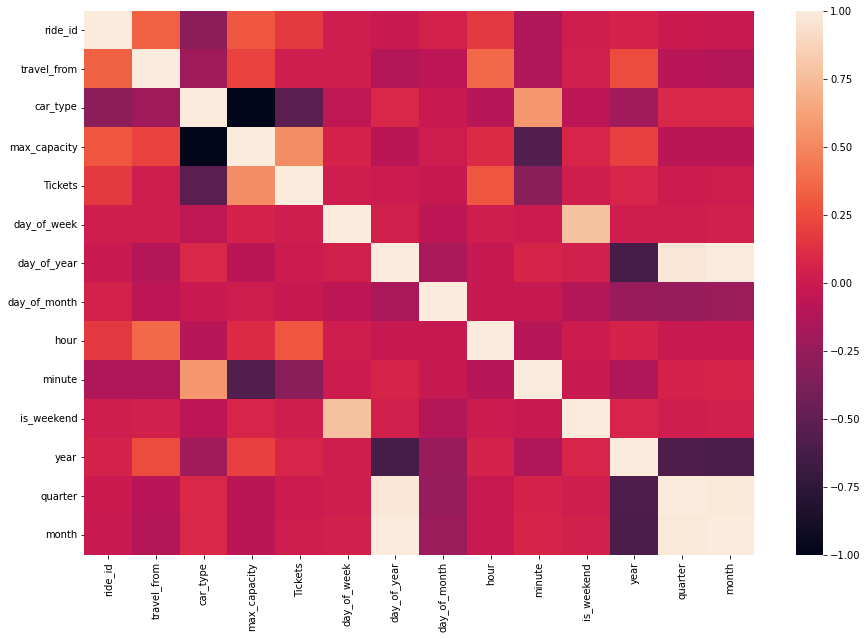

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr())

Inference:
we can see the correlation between the data columns


*   Positive Correlation from 0 to 1
*   Negative Correlation from 0 to -1




In [47]:
df_new.drop(columns = "date",axis=1,inplace= True)

**Importing Libraries**

In [48]:
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


**Linear Regression**

In [49]:
#Getting X and Y variable
dependent_variable = 'Tickets'
independent_variables = list(set(df_new.columns.tolist()) - {dependent_variable})

In [50]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [51]:
#Imported Library  MinMAxScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler


In [53]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# implementing Linear Regressor

In [55]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_
regressor.coef_
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)


In [56]:
# Intercept Values
regressor.intercept_

12.480237032965634

In [57]:
# Coefficent Values
regressor.coef_

array([ -2.84224641,  19.31801018,   0.3325694 ,   4.86157487,
         0.27439579,  -1.10049992,   6.79013669,   0.72051997,
       -14.21706244,  29.71356111,   1.06984518,  -6.79013669,
       -27.35396735])

In [58]:
# Mean Square Error 
mean_squared_error(y_test, y_pred)

94.20727224093356

In [59]:
#R2 Score values for train and test split
r2_score(y_train, y_pred_train)

0.3771862069075488

In [60]:
r2_score(y_test, y_pred)

0.3835700377411465

In [61]:
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.3827931507310287


Inference: R2 for train and test split prediction is 0.38
we conclude that a model performance is low
Hence we go for Regularization and Hypertunning 

**Implementing Lasso Regressor** 

In [62]:
# Implementing Lasso Regressor for Minimizing Error for quantitative response variable

In [63]:
from sklearn.linear_model import Lasso

In [64]:
# X and Y values 

In [65]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


alpha:  0.01
test Score:  0.3834105360947503
train Score:  0.37713264594950924
alpha:  0.025
test Score:  0.38309521064683927
train Score:  0.377011473208126
alpha:  0.5
test Score:  0.38155509644745544
train Score:  0.37551251885116455
alpha:  0.75
test Score:  0.38089342236520096
train Score:  0.37488634473875737
alpha:  1
test Score:  0.3799886186568262
train Score:  0.3740134566782447


In [66]:
# Best Alpha and Max_iter Values

In [67]:
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [68]:
# Y_test predicted values of MSE,RMSE,MAE

In [69]:
y_test_pred = lasso.predict(X_test)

print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE is 94.23164843278813
RMSE is 9.707298719663887
MAE is 7.006064507244938


In [70]:
# R2 and Adjusted R2 values

In [71]:
r2 = r2_score(y_test, y_test_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.3834105360947503
Adjusted R2 :  0.3826334480646224


Inference: R2 for train and test split prediction is 0.38
we conclude that a model performance is low.


**Implementing Ridge Regressor**

In [72]:
#Ridge regressor for the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated

In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [74]:
#Hypertunning
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.6457e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.33347e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.51027e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.21328e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditi

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [75]:
# Best fit Alpha Values

In [76]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -95.7569718714512


In [77]:
#R2 and Adjusted R2 values for Rigde Regressor

In [78]:
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))



r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-95.67797545785263
-94.21755588392244
R2 : 0.3802801950658996
Adjusted R2 :  0.37980709873234253


Inference:R2 for train and test split prediction is 0.38
we conclude that a model performance is still low.

**XGBoost Regressor**

In [79]:
# Implementing xgboost regressor for regressor

In [80]:
import xgboost as xgb

X = df_new[independent_variables].values
y = df_new[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
adj_r2
r2
r2_train

[17:35:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.967666886877978
Test score: 0.9632367492400926


0.967666886877978

In [81]:
# R2 and Adjusted R2 values for XGBoost Regressor

In [82]:
adj_r2

0.9631904164955576

In [83]:
r2

0.9632367492400926

In [84]:
r2_train

0.967666886877978

In [85]:
print('MSE is {}'.format(mean_squared_error(y_test, y_pred)))

MSE is 5.618425100735048


In [86]:
print('MAE is {}'.format(mean_absolute_error(y_test, y_pred)))

MAE is 1.5944197120959882


Inference: R2 for train and test split prediction is 0.92
we conclude that a model performance is very high and fall under the accepted range.

**We will be using  algorithms for each :**

 **GridSearchCV** 
 
 **Hypertunning**


In [87]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

In [88]:
# Parameters for Hypertunning

In [89]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [90]:
# Gridsearchcv implementation

In [91]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[17:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:53] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [92]:
# Best Estimotor parameters

In [93]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 11,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.004}

In [94]:
reg_optimal_model =reg_gs.best_estimator_
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [95]:
reg_optimal_model.score(X_train,y_train)
reg_optimal_model.score(X_test,y_test)

0.9837859127188713

In [96]:
r2_test = r2_score(y_test, test_preds)
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [97]:
# R2 and Adjusted R2 values for GridsearchCV regressor

In [98]:
print(r2_test)
print(adj_r2)

0.9837859127188713
0.9837654780960254


In [99]:
print('MAE is {}'.format(mean_absolute_error(y_test, test_preds)))

MAE is 0.998318903246996


In [100]:
print('MSE is {}'.format(mean_squared_error(y_test, test_preds)))

MSE is 2.4779537468201878


Inference:R2 value for Gridsearch Cv for XGBoost Regressor is 0.98
we conclude that a model considered as very high and fall under the accepted range

### **Conclusion**

**We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso),XGboost regresssor and Also we tuned the parameters of  XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.**

**This resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to offer promotions and sell other services more effectively, such as micro-insurance, or even improve customer service by being able to send alerts and other useful information to customers. We used different type of regression algorithms to train our model like, out of them XG Boost with tuned hyperparameters gave the best result**

**Summary**

Challenges faced
Feature engineering – to get the more required features that will ease the further analysis

What should be the dependent variables

To filter the given data
Feature to be selected to get the required output


Transport Demand was done by the 4 members of group-Syed Aquib,Ganesh Subramanian,Mayur Chulbhare,Abhishek kirar. In this project we selected Global Terrorism Analysis as a CSV file.

As soon as we downloaded the CSV file from Almabetter Dashboard we uploaded the file in colab notebook through the drive.we were having no idea about the project as this was a first project. All the member in group were parcipated equally throughout the project. As a team we read the data present in the file and gone through the data in each columns detailed as individual.The data was huge which some of it was not needed for the analysis.

The data was cleaned and created the new dataframe were columns we required for the analysis.Each and every columns were compared to gain the knowledge about the data.Worked individually gaining some insights doing some EDA. The first problem we faced was the name of the columns and nan values present in the data.We renamed the columns by using a dictionary format, we replaced all nan values to Zero in int dtype and unknown in object dtype by using .replace syntax. By getting info of dataframe we plotted graphs for each data to understand and visualized thoroughly.we splitted data into training and testing to predict model.We predictted modelling by using Linear Regressor,Regularized linear regression (Ridge and Lasso),XGboost regresssor and Also we tuned the parameters of  XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.